##**Standard (Fully Connected) Neural Network**

##**Loading Required Packages and Data**

In [4]:
!pip install tensorflow

In [5]:
#from tensorflow.keras.datasets import mnistimport tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [6]:
# Load the Fashion MNIST dataset
fashion_mnist= tf.keras.datasets.fashion_mnist

##**Data Splitting**

In [7]:
# splitting the data into test and train set
(X_train,Y_train),(X_test,Y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


##**Dataset Display**

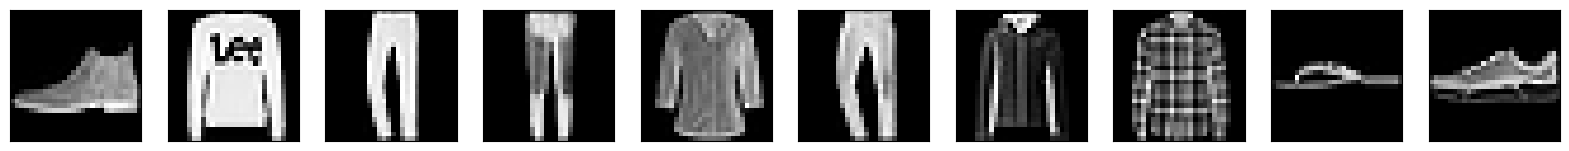

In [8]:
import matplotlib.pyplot as plt
# Number of images to display
n=10
# Create a figure to display the images

plt.figure(figsize=(20,4))
# Loop through the first 'n' images

for i in range(n):
  # Create a subplot within the figure

  ax=plt.subplot(2,n,i+1)
      # Display the original image

  plt.imshow(X_test[i].reshape(28,28))
      # Set colormap to grayscale

  plt.gray()
    # Hide x-axis and y-axis labels and ticks

  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
# Show the figure with the images

plt.show()
# Close the figure

plt.close()

# Flattening the images


In [9]:
#print the shape of the original training data and labels
print("Previous X_train shape:{} \nPrevious Y_train shape:{}".format(X_train.shape,Y_train.shape))

Previous X_train shape:(60000, 28, 28) 
Previous Y_train shape:(60000,)


In [10]:
# Reshape training and testing data to a flat format (flattening the images)
X_train= X_train.reshape(60000,784)
X_test= X_test.reshape(10000,784)

##**Min-Max Scalling**

In [11]:
# Convert the data type of the images to float32
X_train= X_train.astype('float32')
X_test = X_test.astype('float32')
# Normalize the pixel values to a range between 0 and 1

X_train/=255
X_test/=255

##**Processing the Target Variable**

In [12]:
# Number of classes in the dataset
classes =10
# Convert the labels to one-hot encoded format

Y_train =to_categorical(Y_train,classes)
Y_test= to_categorical(Y_test,classes)
# Print the shapes of the preprocessed training data and labels

print("New X_train shape: {} \nNew Y_train shape:{}".format(X_train.shape,Y_train.shape))

New X_train shape: (60000, 784) 
New Y_train shape:(60000, 10)


##**Setting up Hyper-parameters**

In [13]:
# Define the input size for each data sample (e.g., image pixels)
input_size= 784

# Specify the number of data samples to process in each batch
batch_size= 100

# Define the number of neurons in the first hidden layer
hidden1= 400

# Define the number of neurons in the second hidden layer
hidden2=80

# Define the number of neurons in the third hidden layer
hidden3=40

# Define the total number of classes/categories in the dataset
classes= 10

# Set the number of complete passes through the dataset during training
epochs= 40

##**Building the FCN Model**

In [14]:
# Create a Sequential model, which allows us to build a neural network layer by layer
model= Sequential()

# Add the first hidden layer with 'hidden1' neurons, using ReLU activation function
# The 'input_dim' specifies the input size for this layer
model.add(Dense(hidden1,input_dim=input_size,activation='relu'))

# Add the second hidden layer with 'hidden2' neurons, also using ReLU activation function
model.add(Dense(hidden2,activation='relu'))

# Add the third hidden layer with 'hidden3' neurons, also using ReLU activation function
model.add(Dense(hidden3,activation='relu'))

# Add the output layer with 'classes' neurons, using softmax activation function
# Softmax activation ensures that the output values represent probabilities of each class
model.add(Dense(classes,activation='softmax'))

# Compile the model by specifying the loss function, optimizer, and evaluation metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='sgd')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               314000    
                                                                 
 dense_1 (Dense)             (None, 80)                32080     
                                                                 
 dense_2 (Dense)             (None, 40)                3240      
                                                                 
 dense_3 (Dense)             (None, 10)                410       
                                                                 
Total params: 349730 (1.33 MB)
Trainable params: 349730 (1.33 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##**Training the Model**

In [15]:
# Import necessary libraries
from time import time

# Record the current time to measure training time
tic = time()

# Fit the model on the training data
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

# Record the time after model training
toc = time()

# Calculate and print the time taken for model training
print("Model training took {} secs".format(toc - tic))


Epoch 1/40
600/600 [==============================] - 5s 5ms/step - loss: 1.0473 - accuracy: 0.6593
Epoch 2/40
600/600 [==============================] - 3s 5ms/step - loss: 0.5982 - accuracy: 0.7998
Epoch 3/40
600/600 [==============================] - 3s 5ms/step - loss: 0.5160 - accuracy: 0.8221
Epoch 4/40
600/600 [==============================] - 3s 6ms/step - loss: 0.4748 - accuracy: 0.8334
Epoch 5/40
600/600 [==============================] - 5s 8ms/step - loss: 0.4510 - accuracy: 0.8431
Epoch 6/40
600/600 [==============================] - 4s 6ms/step - loss: 0.4319 - accuracy: 0.8482
Epoch 7/40
600/600 [==============================] - 3s 6ms/step - loss: 0.4185 - accuracy: 0.8533
Epoch 8/40
600/600 [==============================] - 4s 6ms/step - loss: 0.4041 - accuracy: 0.8583
Epoch 9/40
600/600 [==============================] - 6s 10ms/step - loss: 0.3937 - accuracy: 0.8618
Epoch 10/40
600/600 [==============================] - 3s 5ms/step - loss: 0.3848 - accuracy: 0.864

##**Testing the Model**

In [16]:
# Import the necessary libraries
from sklearn.metrics import accuracy_score
import numpy as np

# Predict probabilities for the test set using the trained model
import matplotlib.pyplot as plt
y_pred_probs= model.predict(X_test,verbose=0)
y_pred= np.where(y_pred_probs > 0.5,1,0)

# Calculate and print the test accuracy using predicted and true labels
test_accuracy= accuracy_score(y_pred,Y_test)

print("\n Test accuracy:{}".format(test_accuracy))


 Test accuracy:0.8553
